# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train, test = tf.keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x):
    return tf.keras.utils.normalize(x, axis=-1, order=2).reshape((len(x), -1))

def preproc_y(y):
    return tf.keras.utils.to_categorical(y)

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = tf.keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = tf.keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    out = tf.keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = tf.keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [6]:
## 超參數設定

OPTIMIZER = ['sgd', 'RMSprop', 'Adagrad', 'Adam']
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95

In [7]:
def lr_experiment(opt):
    results = {}
    for lr in LEARNING_RATE:
        tf.keras.backend.clear_session() # 把舊的 Graph 清掉
        # print("Experiment with momentum = %.2f" % (mom))
        model = build_mlp(input_shape=x_train.shape[1:])
        # model.summary()
        if opt == "sgd":
            optimizer = tf.keras.optimizers.SGD(lr=lr)
        elif opt == "RMSprop":
            optimizer = tf.keras.optimizers.RMSprop(lr=lr)
        elif opt == "Adagrad":
            optimizer = tf.keras.optimizers.Adagrad(lr=lr)
        else:
            optimizer = tf.keras.optimizers.Adam(lr=lr)

        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_data=(x_test, y_test),
                shuffle=True, verbose=0)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = opt + "lr-%s" % str(lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}
    return results

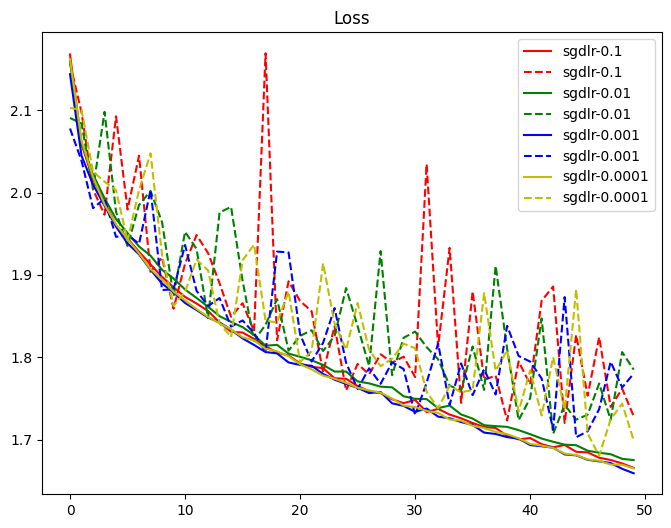

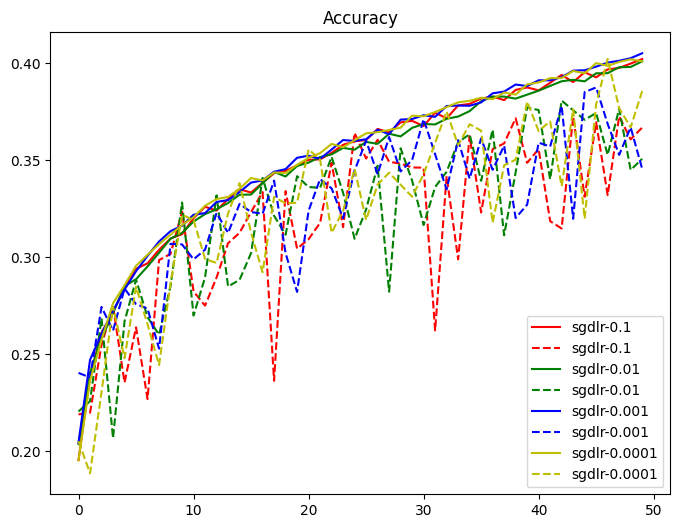

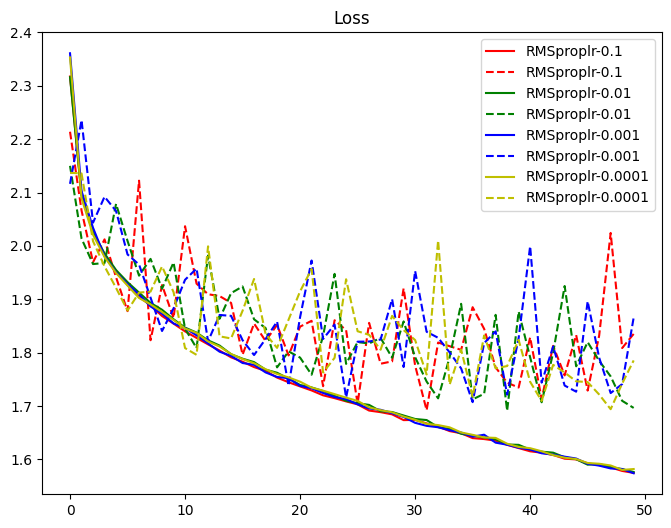

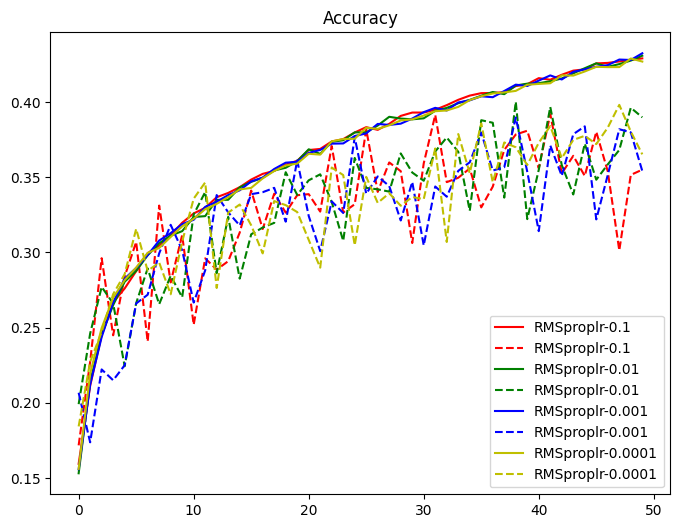

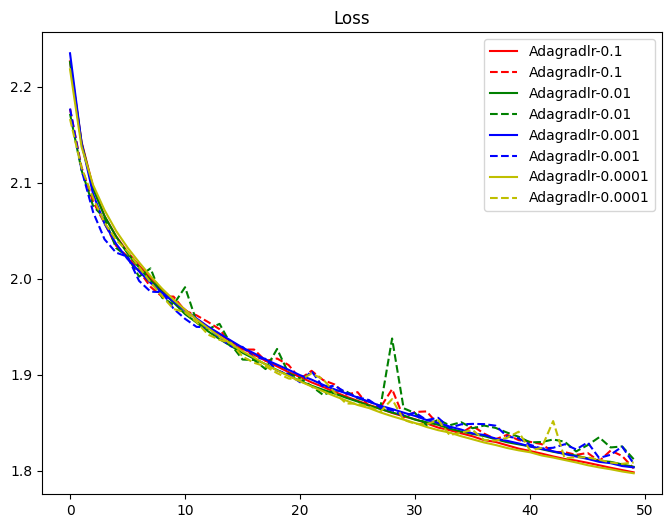

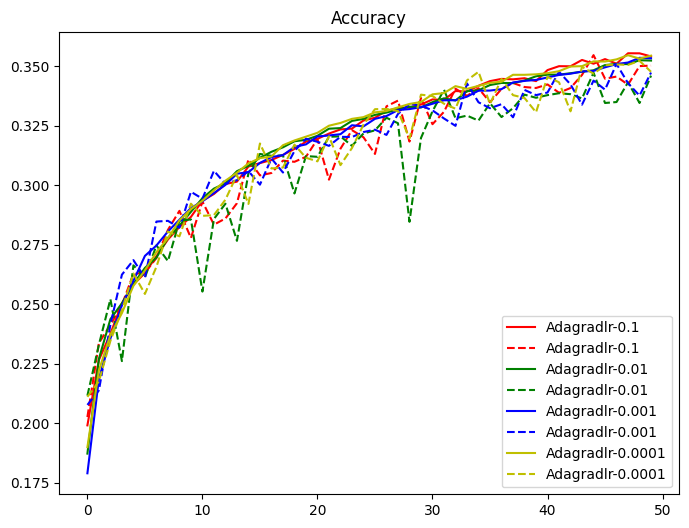

In [ ]:
for opt in OPTIMIZER:
    results = lr_experiment(opt)

    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
       plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
       plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

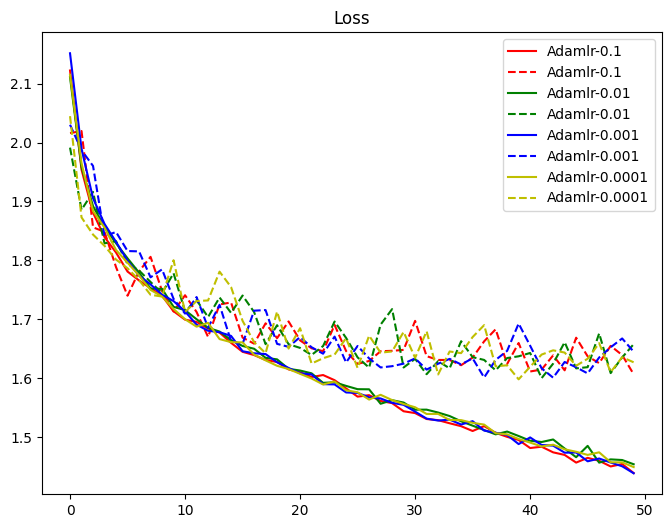

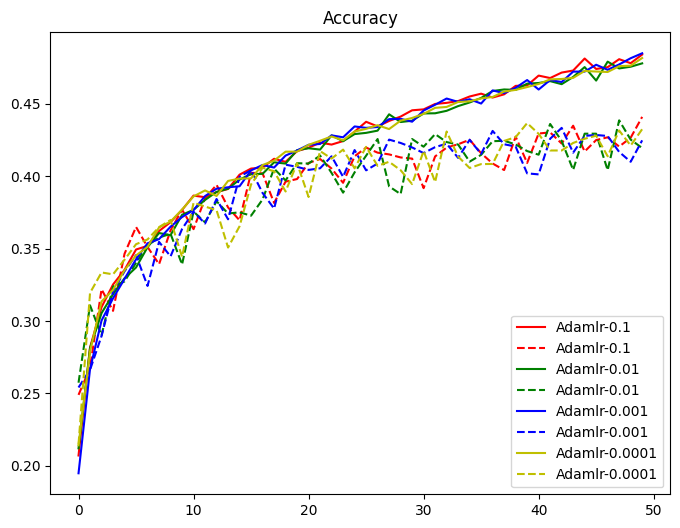

In [10]:
results = lr_experiment("Adam")

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()